In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow import keras

%matplotlib inline

2022-10-27 11:42:41.976756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 11:42:42.190957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 11:42:42.190996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 11:42:42.248373: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 11:42:43.262330: W tensorflow/stream_executor/platform/de

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
train_set_x_orig.shape
train_set_y.shape
test_set_x_orig.shape
test_set_y.shape

print(train_set_x_orig.shape, '\n', 
      train_set_y.shape, '\n', 
      test_set_x_orig.shape, '\n', 
      test_set_y.shape)

(209, 64, 64, 3) 
 (1, 209) 
 (50, 64, 64, 3) 
 (1, 50)


In [5]:
print(type(train_set_x_orig))

#concatenamos ambos conjuntos de X para que no estén desproporcionados
new_x = np.concatenate((train_set_x_orig, test_set_x_orig), axis=0)
new_x.shape

<class 'numpy.ndarray'>


(259, 64, 64, 3)

In [6]:
new_y = np.concatenate((train_set_y.T, test_set_y.T), axis=0)
new_y.shape

(259, 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#lo volvemos a separar ya con la correcta separación, no tan desproporcionada como antes
#podemos probar 80%- 20%
X_train, X_test, y_train, y_test = train_test_split(new_x,
                                                    new_y, 
                                                    test_size=0.25,
                                                    random_state=50)

print(X_train.shape) 
print(y_train.shape)
# X_test contains 25% of total dataset
print(X_test.shape) 
print(y_test.shape)

(194, 64, 64, 3)
(194, 1)
(65, 64, 64, 3)
(65, 1)


In [10]:
print(y_train.sum()/len(y_train))

0.41237113402061853


In [11]:
print(y_test.sum()/len(y_test))

0.38461538461538464


In [12]:
X_train_n = X_train / 255

X_test_n = X_test / 255


In [13]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

# Your code below

Use layers.Conv2D

For instance for first layer

network.add(layers.Conv2D(32, (3, 3),
                         activation='relu',
                         input_shape=(64, 64, 3)))

and after that

network.add(layers.MaxPool2D((2,2)))

and for output layer

network.add(layers.Flatten())
network.add(layers.Dense(256,
                        activation = 'relu'))            
network.add(layers.Dense(2, 
                         activation='softmax'))




In [18]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), 
                          activation='relu', 
                          input_shape=(64, 64, 3)))

network.add(layers.MaxPool2D((2,2)))

network.add(layers.Flatten()) 

network.add(layers.Dense(256, activation = 'relu'))

network.add(layers.Dense(2, 
                         activation='softmax'))

2022-10-27 12:04:30.870118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-27 12:04:30.870178: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 12:04:30.870218: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pedro-HP-EliteBook-840-G3): /proc/driver/nvidia/version does not exist
2022-10-27 12:04:30.870624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 12:04:31.000825: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3

In [19]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 256)               7872768   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 7,874,178
Trainable params: 7,874,178
Non-trainable params: 0
______________________________________________

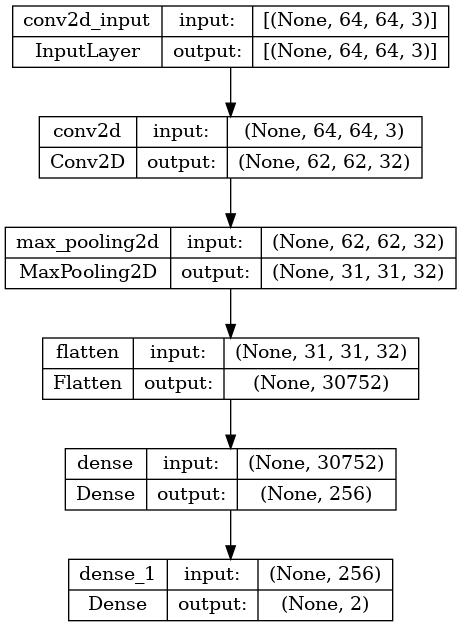

In [21]:
from keras.utils.vis_utils import plot_model

plot_model(network, 
           to_file = 'model_plot_00.png', 
           show_shapes = True, 
           show_layer_names = True)

In [22]:
network.fit(X_train_n, 
            y_train, 
            epochs = 10, 
            batch_size = 32)

Epoch 1/10


2022-10-27 12:10:01.888471: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2022-10-27 12:10:02.497572: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.


7/7 [==============================] - 3s 219ms/step - loss: 8.8589 - accuracy: 0.5464
Epoch 2/10
7/7 [==============================] - 1s 211ms/step - loss: 1.2501 - accuracy: 0.6392
Epoch 3/10
7/7 [==============================] - 1s 170ms/step - loss: 0.7910 - accuracy: 0.6959
Epoch 4/10
7/7 [==============================] - 1s 161ms/step - loss: 0.6812 - accuracy: 0.6753
Epoch 5/10
7/7 [==============================] - 1s 175ms/step - loss: 0.3956 - accuracy: 0.8041
Epoch 6/10
7/7 [==============================] - 1s 134ms/step - loss: 0.7219 - accuracy: 0.7732
Epoch 7/10
7/7 [==============================] - 1s 145ms/step - loss: 0.6215 - accuracy: 0.7371
Epoch 8/10
7/7 [==============================] - 1s 126ms/step - loss: 0.3488 - accuracy: 0.8763
Epoch 9/10
7/7 [==============================] - 1s 141ms/step - loss: 0.5246 - accuracy: 0.7732
Epoch 10/10
7/7 [==============================] - 1s 144ms/step - loss: 0.3483 - accuracy: 0.8402


In [24]:
test_loss, test_acc = network.evaluate(X_test_n, y_test)
print('test_acc:', test_acc)

3/3 [==============================] - 0s 25ms/step - loss: 0.3771 - accuracy: 0.8154
test_acc: 0.8153846263885498
